# Practice notebook for hypothesis tests using NHANES data

This notebook will give you the opportunity to perform some hypothesis tests with the NHANES data that are similar to
what was done in the week 3 case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
import scipy.stats.distributions as dist
import statsmodels.stats as stats

In [2]:
df = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Conduct a hypothesis test (at the 0.05 level) for the null hypothesis that the proportion of women who smoke is equal to the proportion of men who smoke.

#### Difference in proportions
* Population: Males, Females
* Parameter: Proportion of male smokers, proportion of female smokers
* Null hypothesis: Proportion of male smokers - proportion of female smokers = 0
* Alternative hypothesis: Proportion of male smokers - proportion of female smokers != 0

In [3]:
# insert your code here
df["RIAGENDRx"] = df.RIAGENDR.replace({1: 'Male', 2: 'Female'})
df["SMQ020x"] = df.SMQ020.replace({1: 'Yes', 2: 'No'})

In [4]:
df_male = df[(df.RIAGENDRx == 'Male') & ((df.SMQ020x == 'Yes') | (df.SMQ020x == 'No'))]
df_female = df[(df.RIAGENDRx == 'Female') & ((df.SMQ020x == 'Yes') | (df.SMQ020x == 'No'))]

series_smoke_male = df_male.SMQ020x.dropna()
series_smoke_male = series_smoke_male == 'Yes'
series_smoke_female = df_female.SMQ020x.dropna()
series_smoke_female = series_smoke_female == 'Yes'

In [5]:
series_smoke_male.head()

0     True
1     True
2     True
6     True
8    False
Name: SMQ020x, dtype: bool

In [7]:
#separate proportion of smokers for males and females
p_smoke_male = series_smoke_male.mean()
n_male = series_smoke_male.count()

p_smoke_female = series_smoke_female.mean()
n_female = series_smoke_female.count()

In [8]:
# find the combined proportion
df_combined = df[(df.SMQ020x == 'Yes') | (df.SMQ020x == 'No')]
series_combined = df_combined.SMQ020x == 'Yes'
p_combined = series_combined.mean()
n_combined = series_combined.count()

# get the S.E.
variance = p_combined * (1-p_combined)
se = np.sqrt(variance * (1 / n_male + 1 / n_female))


In [10]:
(p_combined, variance, se)

(0.4050655021834061, 0.2409874411243111, 0.01298546309757376)

In [11]:
test_stat = (p_smoke_male - p_smoke_female) / se
p_value = 2 * dist.norm.cdf(-np.abs(test_stat))
(test_stat, p_value)

(16.049719603652488, 5.742288777302776e-58)

__Q1a.__ Write 1-2 sentences explaining the substance of your findings to someone who does not know anything about statistical hypothesis tests.

__Q1b.__ Construct three 95% confidence intervals: one for the proportion of women who smoke, one for the proportion of men who smoke, and one for the difference in the rates of smoking between women and men.

In [12]:
# 95% CI for proportion of male smokers
se_smoke_male = np.sqrt(p_smoke_male * (1-p_smoke_male)/n_male)
me_smoke_male = 1.96 * se_smoke_male
ll_m = p_smoke_male - me_smoke_male
ul_m = p_smoke_male + me_smoke_male
print("95% CI for Proportion of Male Smokers : (", ll_m, ",", ul_m, "), with estimated proportion of male smokers :", p_smoke_male)

# 95% CI for proportion of female smokers
se_smoke_female = np.sqrt(p_smoke_female * (1-p_smoke_female)/n_female)
me_smoke_female = 1.96 * se_smoke_female
ll_f = p_smoke_female - me_smoke_female
ul_f = p_smoke_female + me_smoke_female
print("95% CI for Proportion of Female Smokers : (", ll_f, ",", ul_f, "), with estimated proportion of female smokers :", p_smoke_female)


# 95% CI for difference in proportion of male and female smokers
p_diff = p_smoke_male - p_smoke_female
# se
me_diff = 1.96 * se
ll_diff = p_diff - me_diff
ul_diff = p_diff + me_diff
print("95% CI for Difference in proportion of Male and Female Smokers : (", ll_diff, ",", ul_diff, "), with estimated difference in proportion :", p_diff)


95% CI for Proportion of Male Smokers : ( 0.49458714955108174 , 0.531929377873546 ), with estimated proportion of male smokers : 0.5132582637123139
95% CI for Proportion of Female Smokers : ( 0.288294683866098 , 0.32139576027925865 ), with estimated proportion of female smokers : 0.30484522207267833
95% CI for Difference in proportion of Male and Female Smokers : ( 0.18296153396839096 , 0.2338645493108801 ), with estimated difference in proportion : 0.20841304163963553


__Q1c.__ Comment on any ways in which the confidence intervals that you found in part b reinforce, contradict, or add support to the hypothesis test conducted in part a.

## Question 2

Partition the population into two groups based on whether a person has graduated college or not, using the educational attainment variable [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2).  Then conduct a test of the null hypothesis that the average heights (in centimeters) of the two groups are equal.  Next, convert the heights from centimeters to inches, and conduct a test of the null hypothesis that the average heights (in inches) of the two groups are equal.

#### Difference in population means
* Population: College graduates, non-college graduates
* Parameter: height (cm)
* Null hypothesis: Difference in mean height between college and non-college graduates = 0
* Alternative hypothesis: Difference in mean height between college and non-college graduates != 0

In [9]:
df["Collegex"] = df.DMDEDUC2.replace({1: "No", 2: "No", 3: "No", 4: "No", 5: "Yes"})

In [14]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210', 'RIAGENDRx', 'SMQ020x', 'Collegex'],
      dtype='object')

In [10]:
df_collegegrad = df[df.Collegex == 'Yes']
df_non_collegegrad = df[df.Collegex == 'No']

college_ht = df_collegegrad.BMXHT.dropna()
college_ht_mean = df_collegegrad.BMXHT.mean()
# college_ht_std = df_collegegrad.BMXHT.std()
# college_ht_n = df_collegegrad.BMXHT.count()

non_college_ht = df_non_collegegrad.BMXHT.dropna()
non_college_ht_mean = df_non_collegegrad.BMXHT.mean()
# non_college_ht_std = df_non_collegegrad.BMXHT.std()
# non_college_ht_n = df_non_collegegrad.BMXHT.count()

In [11]:
diff_ht_mean = college_ht_mean - non_college_ht_mean
print(diff_ht_mean)

2.388831706498877


In [17]:
print(sm.stats.ztest(college_ht, non_college_ht))
print(sm.stats.ttest_ind(college_ht, non_college_ht))

(7.569245765210209, 3.7539736083220206e-14)
(7.569245765210298, 4.3868465661619117e-14, 5412.0)


__Q2a.__ Based on the analysis performed here, are you confident that people who graduated from college have a different average height compared to people who did not graduate from college?

__Q2b:__ How do the results obtained using the heights expressed in inches compare to the results obtained using the heights expressed in centimeters?

## Question 3

Conduct a hypothesis test of the null hypothesis that the average BMI for men between 30 and 40 is equal to the average BMI for men between 50 and 60.  Then carry out this test again after log transforming the BMI values.

#### Difference in population means
* Population: Men 30 to 40 yars old, 50 to 60 years old
* Parameter: BMI (kg/m^2)
* Null hypothesis: Difference in mean BMI between men 30-40 and 50-60 yars old = 0
* Alternative hypothesis: Difference in mean BMI between men 30-40 and 50-60 yars old != 0

In [12]:
#before log transforming BMI
df_male_30_40 = df[(df.RIAGENDRx == "Male") & (df.RIDAGEYR >= 30) & (df.RIDAGEYR <= 40)]
df_male_50_60 = df[(df.RIAGENDRx == "Male") & (df.RIDAGEYR >= 50) & (df.RIDAGEYR <= 60)]
bmi_male_30_40 = df_male_30_40.BMXBMI.dropna()
bmi_male_50_60 = df_male_50_60.BMXBMI.dropna()
bmi_male_30_40_mean = bmi_male_30_40.mean()
bmi_male_50_60_mean = bmi_male_50_60.mean()

sm.stats.ttest_ind(bmi_male_30_40, bmi_male_50_60)

(0.8984008016755045, 0.3691930312327223, 978.0)

In [23]:
bmi_male_30_40_mean - bmi_male_50_60_mean

0.36372950819671956

In [13]:
#after log transforming BMI
df["BMXBMIx"] = np.log(df.BMXBMI)
# initialise the separate dfs for each subpopulation/subsample
df_male_30_40x = df[(df.RIAGENDRx == "Male") & (df.RIDAGEYR >= 30) & (df.RIDAGEYR <= 40)]
df_male_50_60x = df[(df.RIAGENDRx == "Male") & (df.RIDAGEYR >= 50) & (df.RIDAGEYR <= 60)]
# get the log transformed BMI series
bmi_male_30_40x = df_male_30_40x.BMXBMIx.dropna()
bmi_male_50_60x = df_male_50_60x.BMXBMIx.dropna()
bmi_male_30_40x_mean = bmi_male_30_40x.mean()
bmi_male_50_60x_mean = bmi_male_50_60x.mean()

sm.stats.ttest_ind(bmi_male_30_40x, bmi_male_50_60x)

(0.7057844184099299, 0.4804902912676666, 978.0)

In [26]:
bmi_male_30_40x_mean - bmi_male_50_60x_mean

0.009160580904559623

__Q3a.__ How would you characterize the evidence that mean BMI differs between these age bands, and how would you characterize the evidence that mean log BMI differs between these age bands?

## Question 4

Suppose we wish to compare the mean BMI between college graduates and people who have not graduated from college, focusing on women between the ages of 30 and 40.  

* First, consider the **variance of BMI within each of these subpopulations using graphical techniques**, and through the **estimated subpopulation variances**.  
* Then, **calculate pooled and unpooled estimates of the standard error for the difference between the mean BMI in the two populations being compared**.  
* Finally, **test the null hypothesis that the two population means are equal**, using each of the two different standard errors.

#### Difference in population means
* Population: Women college graduate vs non-college graduate; 30 to 40 yars old
* Parameter: BMI (kg/m^2)
* Null hypothesis: Difference in mean BMI between women college graduates vs non-college graduates 30-40 years old = 0
* Alternative hypothesis: Difference in mean BMI between women college graduates vs non-college graduates 30-40 years old != 0

In [14]:
df_female = df[(df.RIAGENDRx == "Female") & (df.RIDAGEYR >= 30) & (df.RIDAGEYR <= 40)]
df_female_coll = df_female[df.Collegex == "Yes"]
df_female_noncoll = df_female[df.Collegex == "No"]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
bmi_female_coll = df_female_coll.BMXBMI.dropna()
bmi_female_noncoll = df_female_noncoll.BMXBMI.dropna()

# mean, sd, count n
bmi_female_coll_mean = bmi_female_coll.mean()
bmi_female_noncoll_mean = bmi_female_noncoll.mean()
bmi_female_coll_std = bmi_female_coll.std()
bmi_female_noncoll_std = bmi_female_noncoll.std()
bmi_female_coll_n = bmi_female_coll.count()
bmi_female_noncoll_n = bmi_female_noncoll.count()

# Standard error, margin of error
bmi_female_coll_se = bmi_female_coll_std/np.sqrt(bmi_female_coll_n)
bmi_female_noncoll_se = bmi_female_noncoll_std/np.sqrt(bmi_female_noncoll_n)
bmi_female_coll_me = 1.96 * bmi_female_coll_se
bmi_female_noncoll_me = 1.96 * bmi_female_noncoll_se

# ll lower bound/limit, ul upper bound/limit
bmi_female_coll_ll = bmi_female_coll_mean - bmi_female_coll_me
bmi_female_coll_ul = bmi_female_coll_mean + bmi_female_coll_me
bmi_female_noncoll_ll = bmi_female_noncoll_mean - bmi_female_noncoll_me
bmi_female_noncoll_ul = bmi_female_noncoll_mean + bmi_female_noncoll_me

sm.stats.ttest_ind(bmi_female_coll, bmi_female_noncoll)

(-4.643908450956424, 4.329847689653882e-06, 523.0)

In [17]:
bmi_female_coll_mean - bmi_female_noncoll_mean

-3.4491574982654285

In [18]:
print("Female 30-40 year old college graduates BMI standard deviation :", bmi_female_coll_std)
print("Female 30-40 year old noncollege graduates BMI standard deviation :", bmi_female_noncoll_std)

Female 30-40 year old college graduates BMI standard deviation : 7.358264076777769
Female 30-40 year old noncollege graduates BMI standard deviation : 8.256082984290918


In [65]:
print("Female 30-40 year old college graduates BMI standard error :", bmi_female_coll_se)
print("Female 30-40 year old noncollege graduates BMI standard error :", bmi_female_noncoll_se)

Female 30-40 year old college graduates BMI standard error : 0.5627005177291212
Female 30-40 year old noncollege graduates BMI standard error : 0.4388058598158775


Text(30.9111,0.03,'95% CI\nUpper Bound')

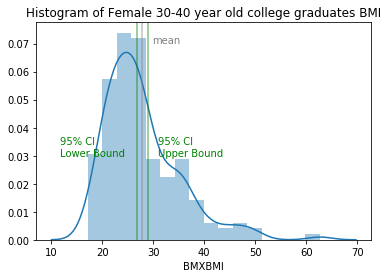

In [52]:
sns.distplot(bmi_female_coll)
plt.title("Histogram of Female 30-40 year old college graduates BMI")

# plot the mean line, 95% CI lines
plt.axvline(x = bmi_female_coll_mean, alpha = 0.5, color = 'grey')
plt.text(x = bmi_female_coll_mean + 2, y = 0.07 , s = 'mean', color = 'grey')
plt.axvline(x = bmi_female_coll_ll, alpha = 0.5, color = 'green')
plt.text(x = bmi_female_coll_ll - 15, y = 0.03 , s = '95% CI\nLower Bound', color = 'green')
plt.axvline(x = bmi_female_coll_ul, alpha = 0.5, color = 'green')
plt.text(x = bmi_female_coll_ul +2, y = 0.03, s = '95% CI\nUpper Bound', color = 'green')


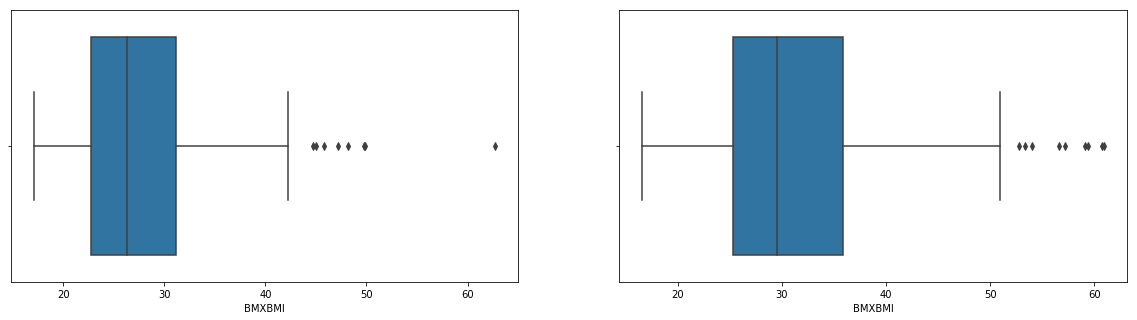

In [64]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.boxplot(bmi_female_coll)

plt.subplot(1, 2, 2)
sns.boxplot(bmi_female_noncoll)

__Q4a.__ Comment on the strength of evidence against the null hypothesis that these two populations have equal mean BMI.

__Q4b.__ Comment on the degree to which the two populations have different variances, and on the extent to which the results using different approaches to estimating the standard error of the mean difference give divergent results.

In [87]:
# Get pooled variance
# pooled_sd = np.sqrt((sd1 ** 2 + sd2 ** 2)/2)
# pooled_se = pooled_sd * np.sqrt(1/n1 + 1/n2)
pooled_sd = np.sqrt((bmi_female_coll_std ** 2 + bmi_female_noncoll_std ** 2)/2)
pooled_se = pooled_sd * np.sqrt(1/bmi_female_coll_n + 1/bmi_female_noncoll_n)
print("Pooled Standard Error :", pooled_se)

# https://github.com/statsmodels/statsmodels/issues/3694
print("Test Statistic from Pooled Variance :", sm.stats.CompareMeans.from_data(bmi_female_coll, bmi_female_noncoll).ztest_ind(usevar='pooled'))


# Get unpooled variance
# unpooled_sd = np.sqrt( ( (n1-1)*sd1 ** 2 + (n2-1)*sd2 ** 2) / (n1+n2-2) )
# unpooled_se = unpooled_sd * np.sqrt(1/n1 + 1/n2)
unpooled_sd = np.sqrt( ( (bmi_female_coll_n-1)*bmi_female_coll_std ** 2 + (bmi_female_noncoll_n-1)*bmi_female_noncoll_std ** 2) / (bmi_female_coll_n+bmi_female_noncoll_n-2) )
unpooled_se = unpooled_sd * np.sqrt(1/bmi_female_coll_n + 1/bmi_female_noncoll_n)
print("Unpooled Standard Error :", unpooled_se)
print("Test Statistic from Unpooled Variance :", sm.stats.CompareMeans.from_data(bmi_female_coll, bmi_female_noncoll).ztest_ind(usevar='unequal'))



Pooled Standard Error : 0.7282668592220845
Test Statistic from Pooled Variance : (-4.643908450956424, 3.4187910067116893e-06)
Unpooled Standard Error : 0.7427272812742616
Test Statistic from Unpooled Variance : (-4.833662355599101, 1.340438616920389e-06)


## Question 5

Conduct a test of the null hypothesis that the **first and second diastolic blood pressure measurements** within a subject have the **same mean values**.

#### Difference in population means (paired-sample)
* Population: Whole sample
* Parameter: First and Second Diastolic Blood Pressure Measurement
* 
* Not sure whether the question here wants us to test whether 
* 1. BPXDI1 - BPXDI2 = 0 across the population, or
* 2. mean BPXDI1 = mean BPXDI2 => mean BPXDI1 - mean BPXDI2 = 0 across the population
* 
* Assume the test is looking at #2 above
* Null hypothesis: Difference between mean of first diastolic blood pressure and mean of second diastolic blood pressure = 0
* Alternative hypothesis: Difference between mean of first diastolic blood pressure and mean of second diastolic blood pressure != 0

In [96]:
# assume we are looking at the diff in means here
# and not the mean of differences much further below
diff_mean = df.BPXDI1.dropna().mean() - df.BPXDI2.dropna().mean()
diff_mean

0.16968305411005247

In [91]:
print(sm.stats.ttest_ind(df.BPXDI1.dropna(), df.BPXDI2.dropna()))

(0.6848982193746493, 0.4934226676888417, 10934.0)


In [95]:
d1 = df.BPXDI1.dropna()
d2 = df.BPXDI2.dropna()
diff = d1-d2
diff_std = diff.std()
diff_n = diff.count()
diff.mean()

0.3490407897187558

In [102]:
# diff_se = (sd_diff/np.sqrt(n))
diff_se = (diff_std/np.sqrt(diff_n))

# diff_t = (diff_mean - 0)/diff_se
diff_t = (diff_mean - 0)/diff_se
print("Standard error for difference in mean of the 1st and 2nd Diastolic Blood Pressure readings :", diff_se)
print("T-statistic for difference in mean of the 1st and 2nd Diastolic Blood Pressure readings :", diff_t)

Standard error for difference in mean of the 1st and 2nd Diastolic Blood Pressure readings : 0.08430148735959599
T-statistic for difference in mean of the 1st and 2nd Diastolic Blood Pressure readings : 2.0128121036139413


__Q5a.__ Briefly describe your findings for an audience that is not familiar with statistical hypothesis testing.

__Q5b.__ Pretend that the first and second diastolic blood pressure measurements were taken on different people.  Modfify the analysis above as appropriate for this setting.

In [ ]:
# from the way this question is phrased, it seems that our analysis above was performed across individuals instead of within each individual
# however, our analysis above did answer the question of the difference in the mean of the 1st diastolic blood pressure reading vs the 2nd reading across individuals
# which should have been meant for this question - 5b

In [ ]:
# so, let us now work on the 'inverse' problem we should have analysed earlier
# which is to look at the difference between the 1st and 2nd diastolic blood pressure readings

# because the original question 5 seemed to suggest that there would be multiple diastolic blood pressure 1 readings and multiple diastolic blood pressure 2 readings
# which would have allowed us to compute the mean of the 1st and 2nd readings respectively


In [106]:
# look at the difference between the 1st and 2nd diastolic blood pressure readings

mean_diff = diff.mean()
diff_se = (diff_std/np.sqrt(diff_n))
diff_t = (mean_diff - 0)/diff_se
# diff_ll = 
# diff_ul = 
# d1d2 = np.array(d1, d2)
# sm.stats.ztest(d1d2, value=0)
sm.stats.ztest(d1, d2, value=0)

(0.6848982193746492, 0.49340814971248503)

__Q5c.__ Briefly describe how the approaches used and the results obtained in the preceeding two parts of the question differ.